## 공공데이타 오픈 API 활용 - 미세먼지 측정
- 한국환경공단_대기오염정보 공공데이타
- https://www.data.go.kr/data/15000581/openapi.do

### xml 온라인 뷰어
- https://codebeautify.org/xmlviewer

### 오픈 API를 이용하여 미세먼지 측정

- 전체 url 완성

In [ ]:
http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureSidoLIst?serviceKey=K24NhVsF0%2BOQOOfwPBXBXmRddhVoP35CScm0f%2F%2Br3er5Bw97CeL%2BoPUnbn7jxOSkDUPeECSWn5OHmNhmhSERxA%3D%3D&numOfRows=25&pageNo=1&sidoName=서울&searchCondition=DAILY

- 소스 코드 전체

In [1]:
from bs4 import BeautifulSoup    
import pandas as pd
import requests

# url 
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureSidoLIst?serviceKey="

#api_key = "발급 받은 API키 입력"
# api_key = "K24NhVsF0%2BOQOOfwPBXBXmRddhVoP35CScm0f%2F%2Br3er5Bw97CeL%2BoPUnbn7jxOSkDUPeECSWn5OHmNhmhSERxA%3D%3D"
api_key = "0x%2B0XxN0L%2FlSe98HiepdvUzVblYyfIHhjembC0JQNhuDb3cIk8xhE0sHyezgAnkxhMQtjSNywgcqB7o38OVtcg%3D%3D"

# 세부 설정
items="&numOfRows=25"# 25개의 구
PageNum="&pageNo=1"  # 1 Page
SidoName="&sidoName=서울" # 서울시
searchCondition="&searchCondition=DAILY" # 실시간 평균정보 조회

# 전체 url 코드 완성
response = requests.get(url+api_key+items+PageNum+SidoName+searchCondition)

# 웹 스크래핑
soup = BeautifulSoup(response.text, 'html.parser')
ItemList=soup.findAll('item')

# 데이터를 담기 위한 리스트 초기화
datetimeList=[] 
citynameList=[]
so2valueList=[]
covalueList=[]
o3valueList=[]
no2valueList=[]
pm10valueList=[]
pm25valueList=[]

# 리스트에 데이타 값 추가
for item in ItemList:
    datetime = item.find('datatime').text 
    cityname = item.find('cityname').text
    so2value = item.find('so2value').text
    covalue = item.find('covalue').text
    o3value = item.find('o3value').text
    no2value = item.find('no2value').text
    pm10value = item.find('pm10value').text
    pm25value = item.find('pm25value').text
    
    datetimeList.append(datetime) 
    citynameList.append(cityname)
    so2valueList.append(so2value)
    covalueList.append(covalue)
    o3valueList.append(o3value)
    no2valueList.append(no2value)
    pm10valueList.append(pm10value)
    pm25valueList.append(pm25value)

# pandas 데이타프레임 모든 데이타 합치기
dust_total = pd.DataFrame()
dust_total['datetime'] = datetimeList
dust_total['cityname'] = citynameList
dust_total['so2value'] = so2valueList
dust_total['covalue'] = covalueList
dust_total['o3value'] = o3valueList
dust_total['no2value'] = no2valueList
dust_total['pm10value'] = pm10valueList
dust_total['pm25value'] = pm25valueList

# csv 형태로 저장하기
dust_total.to_csv("미세먼지.csv", encoding="utf-8-sig", index=False)

# 엑셀 형태로 저장하기
dust_total.to_excel("미세먼지.xlsx", index=False)

### 데이타프레임 값 조회하기

In [2]:
dust_total

,datetime,cityname,so2value,covalue,o3value,no2value,pm10value,pm25value
0,2021-03-15 15:00,강남구,0.003,0.6,0.053,0.026,84,68
1,2021-03-15 15:00,강동구,0.003,0.5,0.003,0.020,97,69
2,2021-03-15 15:00,강북구,0.003,0.6,0.051,0.020,104,72
3,2021-03-15 15:00,강서구,0.003,0.6,0.074,0.019,96,71
4,2021-03-15 15:00,관악구,0.003,0.6,0.055,0.023,71,51
5,2021-03-15 15:00,광진구,0.003,0.5,0.051,0.021,82,65
6,2021-03-15 15:00,구로구,0.003,0.4,0.061,0.018,94,68
7,2021-03-15 15:00,금천구,0.003,0.6,0.062,0.019,95,71
8,2021-03-15 15:00,노원구,0.003,0.6,0.047,0.028,94,63
9,2021-03-15 15:00,도봉구,0.003,0.5,0.056,0.021,83,69


In [3]:
dust_total.loc[0, 'pm10value']

'84'

### 인덱스를 구이름으로 변경

In [4]:
dust_total.index

RangeIndex(start=0, stop=25, step=1)

In [5]:
dust_total.set_index('cityname', inplace=True)

In [6]:
dust_total

,datetime,so2value,covalue,o3value,no2value,pm10value,pm25value
cityname,,,,,,,
강남구,2021-03-15 15:00,0.003,0.6,0.053,0.026,84,68
강동구,2021-03-15 15:00,0.003,0.5,0.003,0.020,97,69
강북구,2021-03-15 15:00,0.003,0.6,0.051,0.020,104,72
강서구,2021-03-15 15:00,0.003,0.6,0.074,0.019,96,71
관악구,2021-03-15 15:00,0.003,0.6,0.055,0.023,71,51
광진구,2021-03-15 15:00,0.003,0.5,0.051,0.021,82,65
구로구,2021-03-15 15:00,0.003,0.4,0.061,0.018,94,68
금천구,2021-03-15 15:00,0.003,0.6,0.062,0.019,95,71
노원구,2021-03-15 15:00,0.003,0.6,0.047,0.028,94,63


### 각 컬럼의 데이타 타입 확인

In [7]:
dust_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   25 non-null     object
 1   so2value   25 non-null     object
 2   covalue    25 non-null     object
 3   o3value    25 non-null     object
 4   no2value   25 non-null     object
 5   pm10value  25 non-null     object
 6   pm25value  25 non-null     object
dtypes: object(7)
memory usage: 1.6+ KB


### 결측치 확인

In [8]:
dust_total.isnull().sum()

datetime     0
so2value     0
covalue      0
o3value      0
no2value     0
pm10value    0
pm25value    0
dtype: int64

In [9]:
dust_total

,datetime,so2value,covalue,o3value,no2value,pm10value,pm25value
cityname,,,,,,,
강남구,2021-03-15 15:00,0.003,0.6,0.053,0.026,84,68
강동구,2021-03-15 15:00,0.003,0.5,0.003,0.020,97,69
강북구,2021-03-15 15:00,0.003,0.6,0.051,0.020,104,72
강서구,2021-03-15 15:00,0.003,0.6,0.074,0.019,96,71
관악구,2021-03-15 15:00,0.003,0.6,0.055,0.023,71,51
광진구,2021-03-15 15:00,0.003,0.5,0.051,0.021,82,65
구로구,2021-03-15 15:00,0.003,0.4,0.061,0.018,94,68
금천구,2021-03-15 15:00,0.003,0.6,0.062,0.019,95,71
노원구,2021-03-15 15:00,0.003,0.6,0.047,0.028,94,63


### 동대문구의 so2value 값 : '-' --> '0'으로 치환

In [10]:
dust_total.loc['동대문구', 'so2value'] 

'-'

In [12]:
dust_total.loc['동대문구', 'so2value'] = '0'
dust_total.loc['동대문구', 'covalue'] = '0'
dust_total.loc['동대문구', 'o3value'] = '0'
dust_total.loc['동대문구', 'no2value'] = '0'

In [14]:
dust_total.loc['동대문구', 'so2value'] 

'0'

In [15]:
dust_total.loc['동대문구', 'pm10value']

'79'

### 날짜를 제외한 모든 컬럼의 데이타 타입을 float32로 변경

In [16]:
dust_total.columns

Index(['datetime', 'so2value', 'covalue', 'o3value', 'no2value', 'pm10value',
       'pm25value'],
      dtype='object')

In [17]:
dust_total['so2value'] = dust_total['so2value'].astype('float32')
dust_total['covalue'] = dust_total['covalue'].astype('float32')
dust_total['o3value'] = dust_total['o3value'].astype('float32')
dust_total['no2value'] = dust_total['no2value'].astype('float32')
dust_total['pm10value'] = dust_total['pm10value'].astype('float32')
dust_total['pm25value'] =dust_total['pm25value'].astype('float32')

In [18]:
dust_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   25 non-null     object 
 1   so2value   25 non-null     float32
 2   covalue    25 non-null     float32
 3   o3value    25 non-null     float32
 4   no2value   25 non-null     float32
 5   pm10value  25 non-null     float32
 6   pm25value  25 non-null     float32
dtypes: float32(6), object(1)
memory usage: 1.5+ KB


### 그래프 시각화

In [19]:
# 한글 폰트 설정 
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':    # 맥OS인 경우 폰트 변경
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우인 경우 폰트 변경
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

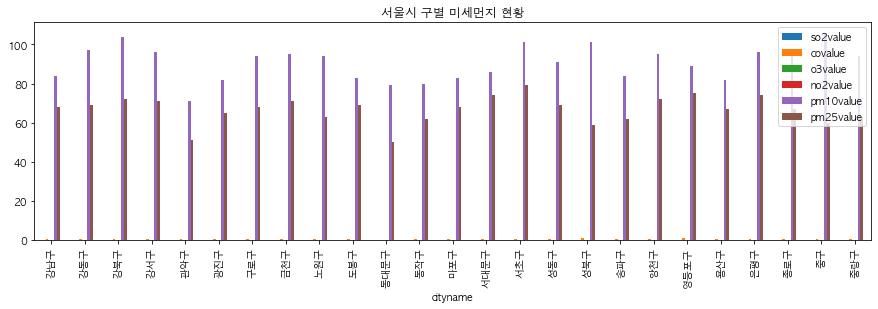

In [20]:
import matplotlib.pyplot as plt 

dust_total.plot(kind='bar', figsize=(15, 4))
plt.title("서울시 구별 미세먼지 현황")
plt.show()

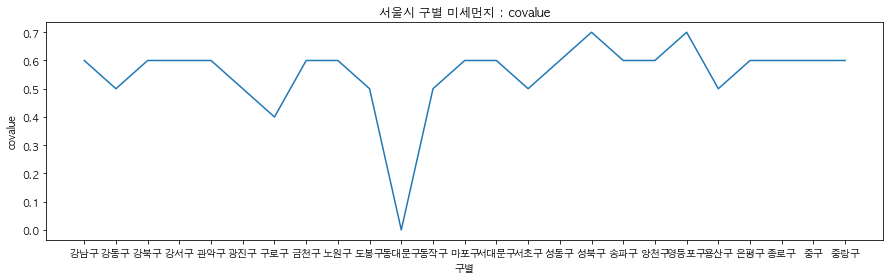

In [21]:
import matplotlib.pyplot as plt 

# 그래프 크기 조절
plt.figure(figsize=(15, 4))

# 그래프 내용 설정
plt.plot(dust_total.index, dust_total['covalue'])

# x축, y축, 전체 타이틀 달기
plt.title("서울시 구별 미세먼지 : {}".format('covalue'))
plt.xlabel("구별")
plt.ylabel("covalue")

# 그래프 보이기
plt.show()

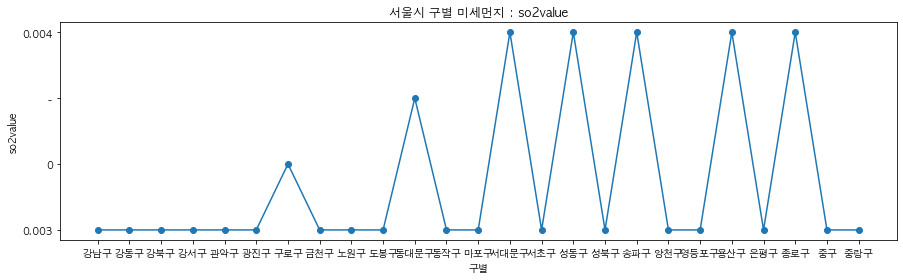

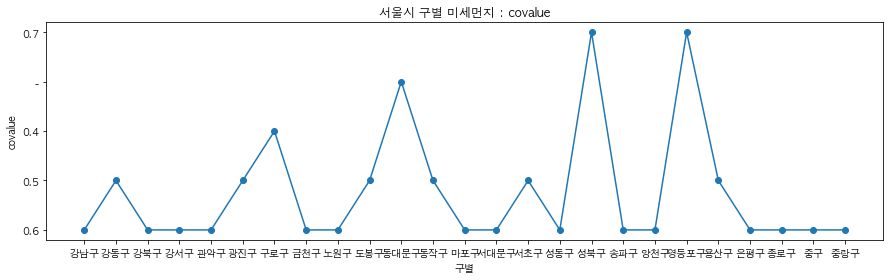

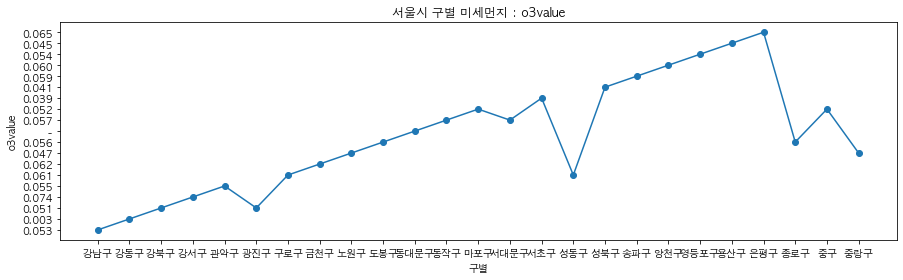

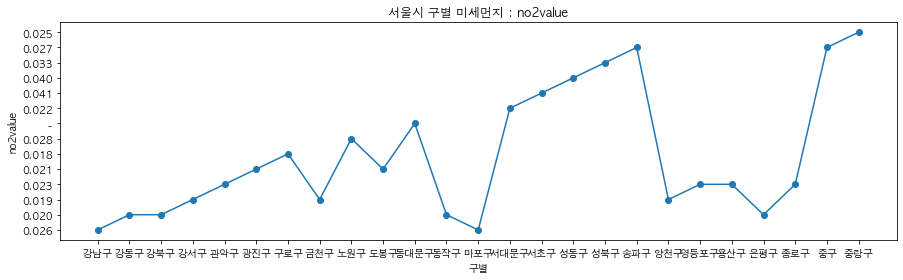

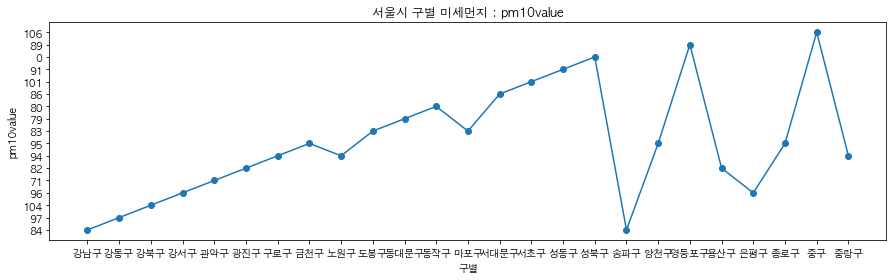

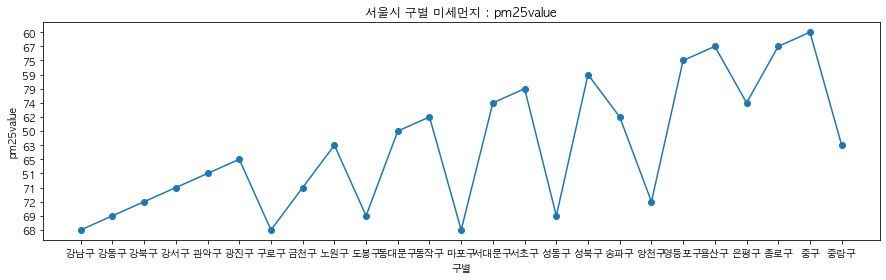

In [20]:
import matplotlib.pyplot as plt 

for name in dust_total.columns[1:]:
    
    # 그래프 크기 조절
    plt.figure(figsize=(15, 4))
    
    # 그래프 내용 설정
    plt.plot(dust_total.index, dust_total[name], marker='o')

    # x축, y축, 전체 타이틀 달기
    plt.title("서울시 구별 미세먼지 : {}".format(name))
    plt.xlabel("구별")
    plt.ylabel(name)

    # 그래프 보이기
    plt.show()

### 같은 화면에 그래프 추가하기

In [22]:
dust_total.columns

Index(['datetime', 'so2value', 'covalue', 'o3value', 'no2value', 'pm10value',
       'pm25value'],
      dtype='object')

<ipython-input-23-5e88e86b7cfc>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dust_total.index, rotation=45)


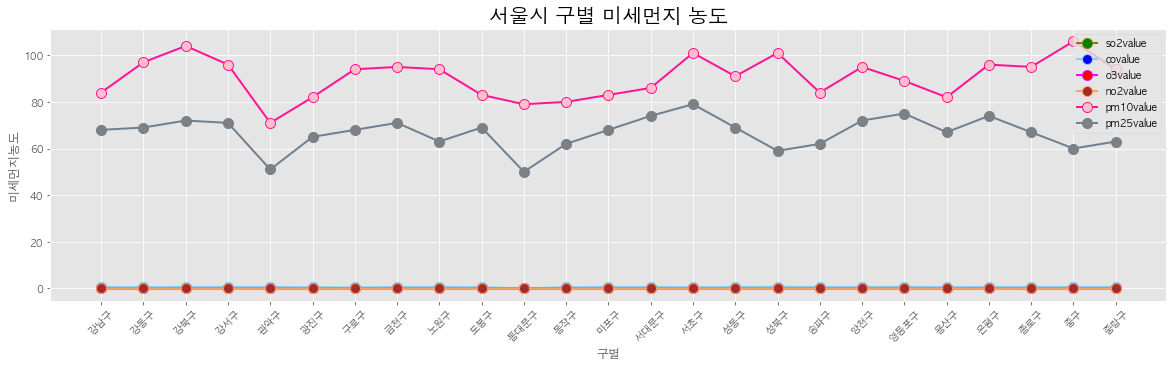

In [23]:
import matplotlib.pyplot as plt 

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(dust_total.index, dust_total.loc[:,'so2value'], marker='o', markerfacecolor='green',
   markersize=10, color='olive', linewidth=2, label='so2value')
ax.plot(dust_total.index, dust_total.loc[:,'covalue'], marker='o', markerfacecolor='blue',
       markersize=10, color='skyblue', linewidth=2, label='covalue')
ax.plot(dust_total.index, dust_total.loc[:,'o3value'], marker='o', markerfacecolor='red',
       markersize=10, color='magenta', linewidth=2, label='o3value')
ax.plot(dust_total.index, dust_total.loc[:,'no2value'], marker='o', markerfacecolor='brown',
       markersize=10, color='sandybrown', linewidth=2, label='no2value')
ax.plot(dust_total.index, dust_total.loc[:,'pm10value'], marker='o', markerfacecolor='pink',
       markersize=10, color='deeppink', linewidth=2, label='pm10value')
ax.plot(dust_total.index, dust_total.loc[:,'pm25value'], marker='o', markerfacecolor='gray',
       markersize=10, color='slategray', linewidth=2, label='pm25value')

# 범례 표시
ax.legend(loc="best")

# 챠트 제목 표시
ax.set_title('서울시 구별 미세먼지 농도', size=20)

# 축 이름 추가
ax.set_xlabel('구별', size=12)
ax.set_ylabel('미세먼지농도', size=12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(dust_total.index, rotation=45)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

# 그래프 출력
plt.show()